# Configurando atividade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:
dados = pd.DataFrame({'x':np.array([[0]*4,[1]*4,[2]*4,[3]*4]).flatten(),
                      'y':list(range(4))*4,
                      'P(X,Y)':[0.05, 0.025, 0.075, 0.1, 0.13, 0.09, 0.15, 0.022, 0.03, 0.046, 0.11, 0.015, 0.010, 0.094, 0.005, 0.048]
                     })
dados

,x,y,"P(X,Y)"
0,0,0,0.050
1,0,1,0.025
2,0,2,0.075
3,0,3,0.100
4,1,0,0.130
5,1,1,0.090
6,1,2,0.150
7,1,3,0.022
8,2,0,0.030
9,2,1,0.046


# Exercício 1 -  Calculando probabilidades e probabilidades condicionais

a) Crie uma função para calcular a distribuição de probabilidades de uma das variáveis do conjunto de dados mostrado acima. Teste sua função para a variável x.

A função deve se chamar distribuicao, retornar uma lista contendo as probabilidades e receber os parâmetros:

        v = string representando o nome da coluna da variável que se deseja calcular as probabilidades
        p = string representando o nome da coluna das probabilidades
        df = dataframe contendo o conjunto de dados

In [ ]:
def distribuicao(v, p, df):
    # v = string representando o nome da coluna da variável que se deseja calcular as probabilidades
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    prob = df.groupby(by=[v])[p].sum()
    return prob

distribuicao("x", "P(X,Y)", dados)

x
0    0.250
1    0.392
2    0.201
3    0.157
Name: P(X,Y), dtype: float64

b) Crie uma função para calcular a distribuição de probabilidade P(Y | X = x ) condicional. Teste sua função para x = 1.

In [ ]:
def condicional(v1, v2, b, p, df):
    # v1 = string representando o nome da coluna da variável que se deseja calcular as probabilidades
    # v2 = string representando o nome da coluna da variável cujo valor será fixado
    # b = valor fixo da variável v2
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    distribuicao_v2_fixo = df[df[v2] == b]
    prob = distribuicao_v2_fixo.groupby(v1)[p].sum()

    return prob

# CHAMAR FUNÇÃO
condicional("y", "x", 1, "P(X,Y)", dados)

y
0    0.130
1    0.090
2    0.150
3    0.022
Name: P(X,Y), dtype: float64

c) Crie uma função que retorne a probabilidade de uma das variáveis ser maior que um valor passado como parâmetro. Teste sua função para o caso P(X > 1).

In [ ]:
def probabilidade_maior_que(v, a, p, df):
    # v = string representando o nome da coluna da variável que se deseja calcular as probabilidades
    # a = valor ao qual a variável v deve ser superior
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    df_superior = df[df[v] > a]

    prob = df_superior.groupby(v)[p].sum()
    return prob.sum()

# CHAMAR FUNÇÃO
probabilidade_maior_que("x", 1, "P(X,Y)", dados)

0.358

# Exercício 2 - (In)Dependência de variáveis aleatórias

Como vimos na aula, dizemos que dois eventos E e F são independentes se a probabilidade de ambos acontecerem é o produto das probabilidades que cada um acontece:

P(E, F) = P(E)P(F)

a) Considerando o conjunto de dados da questão anterior, crie uma fórmula que retorne True caso as variáveis x e y sejam dependentes ou False caso contrário.

In [ ]:
def dependentes(v1, v2, p, df):
    # v1 = string representando o nome da coluna da primeira variável que se deseja verificar (in)dependência
    # v2 = string representando o nome da coluna da segunda variável que se deseja verificar (in)dependência
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    distribuicao_v1 = distribuicao(v1, p, df)
    distribuicao_v2 = distribuicao(v2, p, df)

    for index, row in df.iterrows():
      produto = distribuicao_v1[row[v1]] * distribuicao_v2[row[v2]]
      probabilidade_conjunta = row[p]

      if probabilidade_conjunta != produto:
        return True

    return False

# CHAMAR FUNÇÃO
dependentes("x", "y", "P(X,Y)", dados)

True

b) Utilizando sua função, verifique se os pares de variáveis (x,y), (y,z) e (x,z) são independentes no conjunto de dados d2. Se necessário, realize alterações em sua função.

In [ ]:
d2 = pd.read_csv('https://raw.githubusercontent.com/fccarvalho2/Viz/main/Q2.csv',index_col=0)
d2.head(20)

,x,y,z,"P(X,Y,Z)"
0,1,1,1,2.831080e-03
1,1,1,2,1.075810e-02
2,1,1,3,2.044040e-02
3,1,1,4,2.589117e-02
4,1,1,5,2.459661e-02
5,1,1,6,1.869343e-02
6,1,1,7,1.183917e-02
7,1,1,8,6.426978e-03
8,1,1,9,3.052814e-03
9,1,1,10,1.288966e-03


In [ ]:
print(dependentes("x", "y", "P(X,Y,Z)", d2))
print(dependentes("y", "z", "P(X,Y,Z)", d2))
print(dependentes("x", "z", "P(X,Y,Z)", d2))

True
True
True


# Exercício 3 - Simulação de variáveis aleatórias

Como vimos em aula, podemos criar funções que nos auxiliam a simular dados de uma distribuição. Entretanto, várias destas funções já estão implementadas na biblioteca scipy, o que nos permite gerar dados que seguem uma distribuição de probabilidades de interesse. Utilizando esta biblioteca, simule 1000 amostras das seguintes variáveis:

a) N, que segue a distribuição de poisson (discreta), com média 2.5. Em seguida, gere um histograma com estes resultados e plote a função de densidade acumulada.

[]

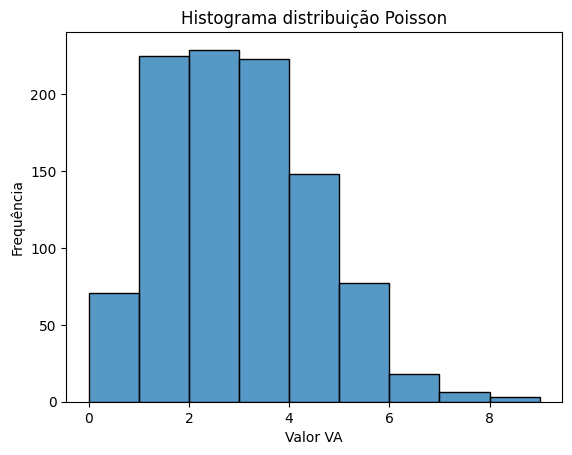

In [ ]:
from scipy.stats import poisson

media_poisson = 2.5 # valor de lambda
quantidade_ocorrencias = 1000 # quantidade de amostras

simulacao_poisson = poisson.rvs(mu=media_poisson, size=quantidade_ocorrencias)

axes = sns.histplot(simulacao_poisson, binwidth=1)
axes.set_title("Histograma distribuição Poisson")
axes.set_xlabel("Valor VA")
axes.set_ylabel("Frequência")
axes.plot()

Text(0, 0.5, 'Probabilidade P(X < x)')

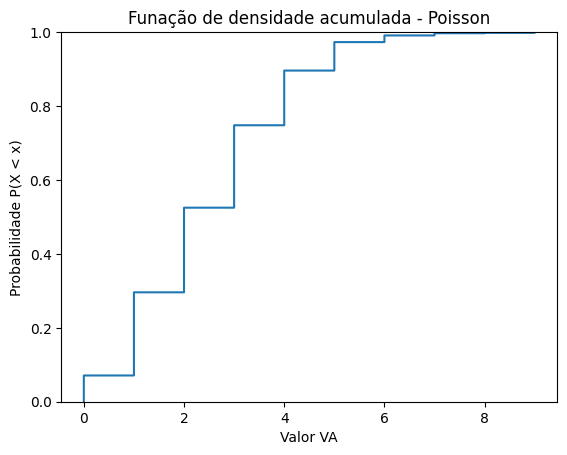

In [ ]:
axes = sns.ecdfplot(simulacao_poisson)
axes.set_title("Funação de densidade acumulada - Poisson")
axes.set_xlabel("Valor VA")
axes.set_ylabel("Probabilidade P(X < x)")


b) G, que segue a distribuição log gamma (contínua), com 4 graus de liberdade. Em seguida, gere um histograma com estes resultados e plote a função de densidade acumulada.

[]

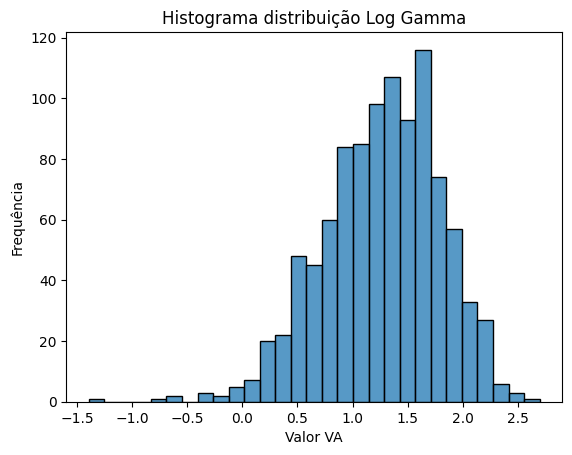

In [ ]:
from scipy.stats import loggamma

graus_liberdade = 4 # valor de lambda
quantidade_ocorrencias = 1000 # quantidade de amostras

simulacao_gamma = loggamma.rvs(c=graus_liberdade, size=quantidade_ocorrencias)

axes = sns.histplot(simulacao_gamma)
axes.set_title("Histograma distribuição Log Gamma")
axes.set_xlabel("Valor VA")
axes.set_ylabel("Frequência")
axes.plot()

Text(0, 0.5, 'Probabilidade P(X < x)')

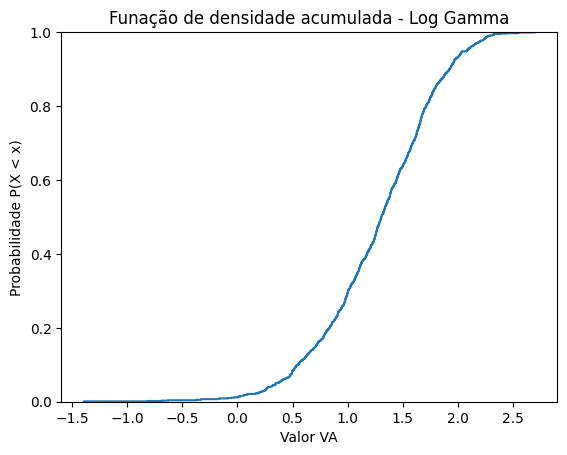

In [ ]:
plot = sns.ecdfplot(simulacao_gamma)
plot.set_title("Funação de densidade acumulada - Log Gamma")
plot.set_xlabel("Valor VA")
plot.set_ylabel("Probabilidade P(X < x)")

# Desafio - Aplicação dos conhecimentos a dados reais
Sabemos que vários fatores relacionados ao estilo de vida de cada um podem ter um grande impacto no risco de doenças cardiovasculares ou infarto. Para este exercício, utilizaremos um banco de dados público dos Centros para Controles de Doenças dos Estados Unidos (CDC), que realizou pesquisa em 2015 a respeito dos hábitos de vida de 253.680 americanos. Este conjunto de dados possui 22 colunas com dados numéricos, em sua maioria categóricos binários (0 para não e 1 para sim).

Desejamos utilizar nossos conhecimentos adquiridos até aqui para responder às seguintes perguntas:

In [ ]:
heart = pd.read_csv('https://raw.githubusercontent.com/fccarvalho2/Viz/main/heart_disease_kaggle.csv')
heart.head(20)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

a) Qual a probabilidade de um entrevistado ter sofrido ataque cardíaco ou possuir doença cardiaca (HeartDiseaseorAttack = 1)?

In [ ]:
heart_filtrado = heart[heart["HeartDiseaseorAttack"] == 1]

total_pessoas_sofreram_efermidade = heart_filtrado["HeartDiseaseorAttack"].count()
total_entrevistados = heart["HeartDiseaseorAttack"].count()

probabilidade = total_pessoas_sofreram_efermidade / total_entrevistados
print(f"A probabilidade de um entrevistado ter sofrido um ataque cardíaco ou possuir uma doença cardiaca é {probabilidade}")

A probabilidade de um entrevistado ter sofrido um ataque cardíaco ou possuir uma doença cardiaca é 0.09418558814254178


b) Qual a probabilidade de um fumante (smoker = 1) ter sofrido ataque cardíaco ou possuir doença cardíaca? E qual a probabilidade para um não fumante?

In [ ]:
heart_apenas_fumantes = heart[heart["Smoker"] == 1]

total_fumantes = heart_apenas_fumantes["HeartDiseaseorAttack"].count()
total_fumantes_sofreram_efermidade = heart_apenas_fumantes.loc[heart_apenas_fumantes["HeartDiseaseorAttack"] == 1, "HeartDiseaseorAttack"].count()

probabilidade = total_fumantes_sofreram_efermidade / total_fumantes
print(f"A probabilidade de um entrevistado fumante ter tido uma enfermidade é: {probabilidade}")

A probabilidade de um entrevistado fumante ter tido uma enfermidade é: 0.13165455467297618


c) Qual a probabilidade de um entrevistado que não faz atividade física e não come frutas regularmente (PhysActivity = 0 e Fruits = 0, respectivamente) ser cardíaco?

In [ ]:
heart_filtrado = heart[(heart["PhysActivity"] == 0) & (heart["Fruits"] == 0)]

total_selecionados = heart_filtrado["HeartDiseaseorAttack"].count()
total_selecionados_sofreram_efermidade = heart_filtrado.loc[heart_filtrado["HeartDiseaseorAttack"] == 1, "HeartDiseaseorAttack"].count()

probabilidade = total_selecionados_sofreram_efermidade / total_selecionados
print(f"A probabilidade de um entrevistado que não faz atividade física e não come frutas regularmente ter tido uma enfermidade é: {probabilidade}")

A probabilidade de um entrevistado que não faz atividade física e não come frutas regularmente ter tido uma enfermidade é: 0.1366628981844783


d) Qual a probabilidade de um entrevistado com obesidade (BMI >= 30.0) ser cardíaco?

In [ ]:
heart_obesidade = heart[(heart["BMI"] >= 30)]

total_com_obesidade = heart_obesidade["HeartDiseaseorAttack"].count()
total_com_obesidade_sofreram_efermidade = heart_obesidade.loc[heart_obesidade["HeartDiseaseorAttack"] == 1, "HeartDiseaseorAttack"].count()

probabilidade = total_com_obesidade_sofreram_efermidade / total_com_obesidade
print(f"A probabilidade de um entrevistado com obesidade ter tido uma enfermidade é: {probabilidade}")

A probabilidade de um entrevistado com obesidade ter tido uma enfermidade é: 0.11529749234499323


e) Com base nos resultados anteriores, qual dos fatores de risco analisados mais contribui para risco de desenvolver doenças cardíacas ou infarto?

Com base nos resultados, é possível notar que aqueles que **não fazem atividade física e não comem frutas regularmente** tem uma probabilidade maior de desenvolver uma doença cardíaca ou ter um infarto